In [1]:
DATA_DIR = "../data/simulation"

In [2]:
import glob
import pandas as pd

# Pattern for all summary.txt files in subfolders
pattern = "../data/simulation/scope_output/*/summary.txt"

# Get file paths
filepaths = glob.glob(pattern)

# Create a list of dicts with filepath and file contents
data = []
for path in filepaths:
    try:
        with open(path, 'r') as f:
            content = f.read().strip()
        data.append({"filepath": path, "summary": content})
    except Exception as e:
        print(f"Error reading {path}: {e}")

# Convert to DataFrame
df = pd.DataFrame(data)

# Show result
print(df.head())
print(f"\nTotal files read: {len(df)}")

                                            filepath  \
0  ../data/simulation/scope_output/n10000_m15_siz...   
1  ../data/simulation/scope_output/n1000_m5_size5...   
2  ../data/simulation/scope_output/n5000_m10_size...   
3  ../data/simulation/scope_output/n1000_m10_size...   
4  ../data/simulation/scope_output/n1000_m5_size5...   

                                   summary  
0  #UNIQUE SOLUTIONS: 5 WITH VALUE 14843.0  
1     #UNIQUE SOLUTIONS: 0 WITH VALUE None  
2     #UNIQUE SOLUTIONS: 0 WITH VALUE None  
3     #UNIQUE SOLUTIONS: 0 WITH VALUE None  
4     #UNIQUE SOLUTIONS: 0 WITH VALUE None  

Total files read: 390


In [3]:
df

,filepath,summary
0,../data/simulation/scope_output/n10000_m15_siz...,#UNIQUE SOLUTIONS: 5 WITH VALUE 14843.0
1,../data/simulation/scope_output/n1000_m5_size5...,#UNIQUE SOLUTIONS: 0 WITH VALUE None
2,../data/simulation/scope_output/n5000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None
3,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None
4,../data/simulation/scope_output/n1000_m5_size5...,#UNIQUE SOLUTIONS: 0 WITH VALUE None
...,...,...
385,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 5 WITH VALUE 987.0
386,../data/simulation/scope_output/n1000_m5_size5...,#UNIQUE SOLUTIONS: 0 WITH VALUE None
387,../data/simulation/scope_output/n5000_m5_size5...,#UNIQUE SOLUTIONS: 0 WITH VALUE None
388,../data/simulation/scope_output/n5000_m15_size...,#UNIQUE SOLUTIONS: 3 WITH VALUE 15044.0


In [4]:
import re
import pandas as pd

# Example: assume df["content"] already exists
pattern = r"#UNIQUE SOLUTIONS:\s*(\d+)\s*WITH VALUE\s*([-\w\.]+)"

# Apply regex extraction
df[["unique_solutions", "value"]] = (
    df["summary"].str.extract(pattern)
)

# Convert numeric columns if possible
df["unique_solutions"] = pd.to_numeric(df["unique_solutions"], errors="coerce")
df["value"] = pd.to_numeric(df["value"], errors="coerce")

# View result
print(df.head())


                                            filepath  \
0  ../data/simulation/scope_output/n10000_m15_siz...   
1  ../data/simulation/scope_output/n1000_m5_size5...   
2  ../data/simulation/scope_output/n5000_m10_size...   
3  ../data/simulation/scope_output/n1000_m10_size...   
4  ../data/simulation/scope_output/n1000_m5_size5...   

                                   summary  unique_solutions    value  
0  #UNIQUE SOLUTIONS: 5 WITH VALUE 14843.0                 5  14843.0  
1     #UNIQUE SOLUTIONS: 0 WITH VALUE None                 0      NaN  
2     #UNIQUE SOLUTIONS: 0 WITH VALUE None                 0      NaN  
3     #UNIQUE SOLUTIONS: 0 WITH VALUE None                 0      NaN  
4     #UNIQUE SOLUTIONS: 0 WITH VALUE None                 0      NaN  


In [5]:
df_0 = df[df['unique_solutions'] == 0]
df_0

,filepath,summary,unique_solutions,value
1,../data/simulation/scope_output/n1000_m5_size5...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
2,../data/simulation/scope_output/n5000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
3,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
4,../data/simulation/scope_output/n1000_m5_size5...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
5,../data/simulation/scope_output/n5000_m10_size...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
...,...,...,...,...
381,../data/simulation/scope_output/n10000_m10_siz...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
382,../data/simulation/scope_output/n5000_m5_size5...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
386,../data/simulation/scope_output/n1000_m5_size5...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN
387,../data/simulation/scope_output/n5000_m5_size5...,#UNIQUE SOLUTIONS: 0 WITH VALUE None,0,NaN


In [6]:
# df_0['filepath'][75]

In [7]:
# !cat ../data/simulation/scope_output/n5000_m15_size1000_cov0.02_p5_s4/log

In [8]:
# import os
# import shutil

# for path in df_0["filepath"]:
#     folder = os.path.dirname(path)  # get parent folder
#     if os.path.exists(folder):
#         print(f"Deleting: {folder}")
#         shutil.rmtree(folder)

In [9]:
df['unique_solutions'].value_counts()

unique_solutions
0    329
5     47
1     12
3      2
Name: count, dtype: int64

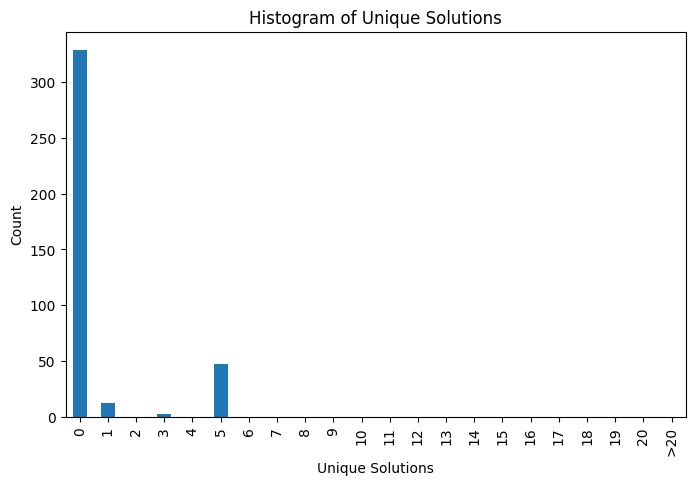

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define bins and labels
bins = list(range(0, 22)) + [np.inf]   # 0–1, 1–2, ..., 10+
labels = [str(i) for i in range(0, 20)] + ["20", ">20"]

# Bin the values
df["unique_solutions_bin"] = pd.cut(
    df["unique_solutions"],
    bins=bins,
    labels=labels,
    right=False
)

# Ensure all bins are represented (even empty ones)
counts = df["unique_solutions_bin"].value_counts().reindex(labels, fill_value=0)

# Plot
counts.plot(kind="bar", figsize=(8,5))
plt.title("Histogram of Unique Solutions")
plt.xlabel("Unique Solutions")
plt.ylabel("Count")
plt.show()


In [12]:
print(df['filepath'][0])

../data/simulation/scope_output/n10000_m15_size1000_cov0.02_p15_s2/summary.txt


In [21]:
!cat ../data/simulation/scope_output/n10000_m15_size1000_cov0.02_p15_s2/summary.txt

#UNIQUE SOLUTIONS: 1 WITH VALUE 14224.0


## Correctness of solution

In [24]:
SIMULATION_STR = "n10000_m15_size1000_cov0.02_p5_s1"

GROUND_TRUTH_DIR = f"../data/simulation/ground_truth/{SIMULATION_STR}"
SCOPE_OUTPUT_DIR = f"../data/simulation/scope_output/{SIMULATION_STR}"

## Are clusters in correct order??

In [25]:
import pandas as pd
import numpy as np

In [26]:
X = pd.read_csv(f"{SCOPE_OUTPUT_DIR}/solution_1/X.csv", index_col=0).astype(int)
X

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [27]:
predicted_B = pd.read_csv(f"{SCOPE_OUTPUT_DIR}/solution_0/B.csv", index_col=0).astype(int)
predicted_B

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
5,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0
6,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0
7,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0
8,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0
9,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0


In [6]:
import pandas as pd
import glob
import os

# 1️⃣ Find all matching files
filepaths = glob.glob("../data/simulation/scope_output/*/solution_0/X.csv")

print(f"Found {len(filepaths)} files.")

# 2️⃣ Read all into a list of DataFrames
dfs = []
for path in filepaths:
    df = pd.read_csv(path, index_col=0).astype(int)
    dfs.append(df)
    print(f"\n✅ Loaded: {path}")
    print(df.head())  # Show first few rows to check values

# 3️⃣ Optionally, combine them into one large DataFrame
# (if they have the same structure)
df_all = pd.concat(dfs, keys=[os.path.dirname(p) for p in filepaths])

# Example: check a few values
print("\nCombined DataFrame shape:", df_all.shape)
print(df_all.sample(5))  # print 5 random rows


Found 1147 files.

✅ Loaded: ../data/simulation/scope_output/n10000_m15_size1000_cov0.02_p15_s2/solution_0/X.csv
   0
0  0
1  1
2  1
3  1
4  1

✅ Loaded: ../data/simulation/scope_output/n1000_m10_size100_cov0.02_p5_s4/solution_0/X.csv
   0
0  1
1  1
2  1
3  1
4  1

✅ Loaded: ../data/simulation/scope_output/n1000_m10_size100_cov0.02_p5_s0/solution_0/X.csv
   0
0  1
1  1
2  1
3  1
4  1

✅ Loaded: ../data/simulation/scope_output/n1000_m15_size100_cov0.1_p5_s3/solution_0/X.csv
   0
0  0
1  1
2  1
3  1
4  1

✅ Loaded: ../data/simulation/scope_output/n10000_m10_size500_cov0.1_p15_s2/solution_0/X.csv
   0
0  0
1  1
2  1
3  1
4  1

✅ Loaded: ../data/simulation/scope_output/n10000_m5_size1000_cov0.1_p15_s2/solution_0/X.csv
   0
0  0
1  1
2  1
3  1
4  1

✅ Loaded: ../data/simulation/scope_output/n10000_m15_size1000_cov0.05_p5_s0/solution_0/X.csv
   0
0  1
1  1
2  1
3  1
4  1

✅ Loaded: ../data/simulation/scope_output/n1000_m5_size500_cov0.1_p5_s3/solution_0/X.csv
   0
0  0
1  1
2  1
3  1
4  1

✅

In [7]:
df_all

0
../data/simulation/scope_output/n10000_m15_size... 0  0
                                                   1  1
                                                   2  1
                                                   3  1
                                                   4  1
...                                                  ..
../data/simulation/scope_output/n5000_m10_size1... 5  1
                                                   6  1
                                                   7  1
                                                   8  1
                                                   9  1

[11190 rows x 1 columns]

In [8]:
import pandas as pd
import glob

# 1️⃣ Get all X.csv file paths
filepaths = glob.glob("../data/simulation/scope_output/*/solution_0/X.csv")

matching_paths = []

# 2️⃣ Check each file
for path in filepaths:
    df = pd.read_csv(path, index_col=0)
    # Check if the value in the first row (index 0) is 0
    if df.iloc[0, 0] == 0:
        matching_paths.append(path)

# 3️⃣ Print matching files
print("Files where value at index 0 is 0:")
for p in matching_paths:
    print("  ", p)


Files where value at index 0 is 0:
   ../data/simulation/scope_output/n10000_m15_size1000_cov0.02_p15_s2/solution_0/X.csv
   ../data/simulation/scope_output/n1000_m15_size100_cov0.1_p5_s3/solution_0/X.csv
   ../data/simulation/scope_output/n10000_m10_size500_cov0.1_p15_s2/solution_0/X.csv
   ../data/simulation/scope_output/n10000_m5_size1000_cov0.1_p15_s2/solution_0/X.csv
   ../data/simulation/scope_output/n1000_m5_size500_cov0.1_p5_s3/solution_0/X.csv
   ../data/simulation/scope_output/n5000_m15_size500_cov0.05_p10_s3/solution_0/X.csv
   ../data/simulation/scope_output/n10000_m5_size1000_cov0.05_p5_s3/solution_0/X.csv
   ../data/simulation/scope_output/n1000_m5_size1000_cov0.05_p15_s4/solution_0/X.csv
   ../data/simulation/scope_output/n5000_m15_size100_cov0.05_p15_s3/solution_0/X.csv
   ../data/simulation/scope_output/n1000_m5_size500_cov0.1_p10_s1/solution_0/X.csv
   ../data/simulation/scope_output/n5000_m10_size100_cov0.02_p10_s3/solution_0/X.csv
   ../data/simulation/scope_output/

In [10]:
import pandas as pd
import glob
import os
import shutil

# 1️⃣ Find all X.csv files
filepaths = glob.glob("../data/simulation/scope_output/*/solution_0/X.csv")

dirs_to_delete = []

# 2️⃣ Identify directories where the first value is 0
for path in filepaths:
    df = pd.read_csv(path, index_col=0)
    if df.iloc[0, 0] == 0:
        dir_to_delete = os.path.dirname(os.path.dirname(path))  # remove solution_0/X.csv
        dirs_to_delete.append(dir_to_delete)

In [11]:
dirs_to_delete

['../data/simulation/scope_output/n10000_m15_size1000_cov0.02_p15_s2',
 '../data/simulation/scope_output/n1000_m15_size100_cov0.1_p5_s3',
 '../data/simulation/scope_output/n10000_m10_size500_cov0.1_p15_s2',
 '../data/simulation/scope_output/n10000_m5_size1000_cov0.1_p15_s2',
 '../data/simulation/scope_output/n1000_m5_size500_cov0.1_p5_s3',
 '../data/simulation/scope_output/n5000_m15_size500_cov0.05_p10_s3',
 '../data/simulation/scope_output/n10000_m5_size1000_cov0.05_p5_s3',
 '../data/simulation/scope_output/n1000_m5_size1000_cov0.05_p15_s4',
 '../data/simulation/scope_output/n5000_m15_size100_cov0.05_p15_s3',
 '../data/simulation/scope_output/n1000_m5_size500_cov0.1_p10_s1',
 '../data/simulation/scope_output/n5000_m10_size100_cov0.02_p10_s3',
 '../data/simulation/scope_output/n1000_m10_size100_cov0.1_p5_s3',
 '../data/simulation/scope_output/n1000_m5_size500_cov0.02_p5_s0',
 '../data/simulation/scope_output/n1000_m15_size1000_cov0.1_p15_s0',
 '../data/simulation/scope_output/n1000_m5_

In [13]:
print("Directories to delete:")
for d in dirs_to_delete:
    print("  ", d)

# 4️⃣ Delete them (⚠️ be careful!)
confirm = input("\nDelete these directories? (y/n): ").strip().lower()
if confirm == "y":
    for d in dirs_to_delete:
        shutil.rmtree(d)
        print(f"Deleted: {d}")
else:
    print("Aborted.")

Directories to delete:
   ../data/simulation/scope_output/n10000_m15_size1000_cov0.02_p15_s2
   ../data/simulation/scope_output/n1000_m15_size100_cov0.1_p5_s3
   ../data/simulation/scope_output/n10000_m10_size500_cov0.1_p15_s2
   ../data/simulation/scope_output/n10000_m5_size1000_cov0.1_p15_s2
   ../data/simulation/scope_output/n1000_m5_size500_cov0.1_p5_s3
   ../data/simulation/scope_output/n5000_m15_size500_cov0.05_p10_s3
   ../data/simulation/scope_output/n10000_m5_size1000_cov0.05_p5_s3
   ../data/simulation/scope_output/n1000_m5_size1000_cov0.05_p15_s4
   ../data/simulation/scope_output/n5000_m15_size100_cov0.05_p15_s3
   ../data/simulation/scope_output/n1000_m5_size500_cov0.1_p10_s1
   ../data/simulation/scope_output/n5000_m10_size100_cov0.02_p10_s3
   ../data/simulation/scope_output/n1000_m10_size100_cov0.1_p5_s3
   ../data/simulation/scope_output/n1000_m5_size500_cov0.02_p5_s0
   ../data/simulation/scope_output/n1000_m15_size1000_cov0.1_p15_s0
   ../data/simulation/scope_output

KeyboardInterrupt: 

In [12]:
len(dirs_to_delete)

944